## **INbreast Cancer Dataset**

URL - https://www.kaggle.com/datasets/ramanathansp20/inbreast-dataset

The images of the dataset are given in a DCM format, Which is an medical format used for DICOM which stands for Digital Imaging and Communications in Medicine. This is the common file format used to store medical imaging data when a patient undergoes a CT, MRI, PET, UltraSound, and many other types of medical scans.

The images are need to be converted to a jpg format to further process the dataset.

## **Converting DICOM images to JPG Format**

In [ ]:
%%capture
!pip install pydicom

In [ ]:
import pydicom 
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image 
import numpy as np
import matplotlib.image as mpimg

from scipy import ndimage
from skimage import morphology

In [ ]:
path = "/content/drive/MyDrive/INBREAST/AllDICOMs/"
single_img_path = "/content/drive/MyDrive/INBREAST/AllDICOMs/20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
target_path = "/content/drive/MyDrive/INBREAST/INbreastImages"

In [ ]:
medical_image = pydicom.read_file(single_img_path)
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 208
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.0.100.4.0
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 4.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9590.100.1.1.241740140812485214905427915863105056665
(0008, 0020) Study Date                          DA: ''
(0008, 0023) Content Date                        DA: '20111229'
(0008, 0030) Stud

In [ ]:
img = medical_image.pixel_array
print(img.shape)

(4084, 3328)


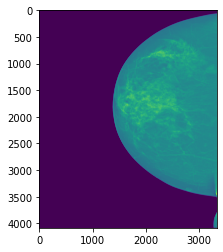

In [ ]:
plt.imshow(img)
plt.show()

### **Saving the converted images to jpg format**

In [ ]:
image_dir= os.listdir(path)

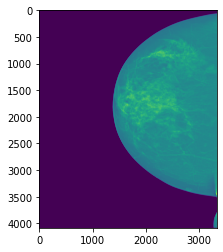

In [ ]:
for img in image_dir:
  img_path = f'/content/drive/MyDrive/INBREAST/AllDICOMs/{img}'
  img_id = img.split("_")[0]
  
  im = pydicom.dcmread(img_path)
  im = im.pixel_array.astype(float)

  rescaled_image = (np.maximum(im,0)/im.max())*255 
  final_image = np.uint8(rescaled_image)

  final_image = Image.fromarray(final_image)
  plt.imshow(final_image)
  if os.path.exists("/content/drive/MyDrive/INBREAST/INbreastImages/"):
    break
  else:
    os.mkdir("/content/drive/MyDrive/INBREAST/INbreastImages")
    final_image.save(f"/content/drive/MyDrive/INBREAST/INbreastImages/{img_id}.jpg") 

### **Preprocessing the Dataset to process further** 

In [ ]:
import re
import pandas as pd
import shutil
import sys

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/INBREAST/INbreast.csv",sep=";")
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads
0,removed,removed,R,CC,201001,22678622,4,1
1,removed,removed,L,CC,201001,22678646,4,3
2,removed,removed,R,MLO,201001,22678670,4,1
3,removed,removed,L,MLO,201001,22678694,4,3
4,removed,removed,R,CC,201001,22614074,2,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient ID        410 non-null    object
 1   Patient age       410 non-null    object
 2   Laterality        410 non-null    object
 3   View              410 non-null    object
 4   Acquisition date  410 non-null    int64 
 5   File Name         410 non-null    int64 
 6   ACR               410 non-null    object
 7   Bi-Rads           410 non-null    object
dtypes: int64(2), object(6)
memory usage: 25.8+ KB


In [ ]:
df["Bi-Rads"].value_counts()

2     220
1      67
5      49
3      23
4c     22
4a     13
6       8
4b      8
Name: Bi-Rads, dtype: int64

In [ ]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4a', '4c', '6', '4b'], dtype=object)

In [ ]:
df["Bi-Rads"] = df["Bi-Rads"].str.replace(r'[^0-9]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df["Bi-Rads"].unique()

array(['1', '3', '5', '2', '4', '6'], dtype=object)

In [ ]:
df["Bi-Rads"] = df["Bi-Rads"].astype(int)

In [ ]:
result = []
for bi in df["Bi-Rads"]:
  if bi == 1:
    result.append("Normal")
  elif bi > 1 and bi < 3:
    result.append("Benign")
  else:
    result.append("Malignant")

df["Severity"] = result   

In [ ]:
df.head()

,Patient ID,Patient age,Laterality,View,Acquisition date,File Name,ACR,Bi-Rads,Severity
0,removed,removed,R,CC,201001,22678622,4,1,Normal
1,removed,removed,L,CC,201001,22678646,4,3,Malignant
2,removed,removed,R,MLO,201001,22678670,4,1,Normal
3,removed,removed,L,MLO,201001,22678694,4,3,Malignant
4,removed,removed,R,CC,201001,22614074,2,5,Malignant


In [ ]:
df1 = df[["File Name", "Severity"]]
df1.head(3)

,File Name,Severity
0,22678622,Normal
1,22678646,Malignant
2,22678670,Normal


In [ ]:
df1["File Name"] = df1["File Name"].astype("str")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Creating Directory for each class name and appending images**

In [ ]:
df_class = df1[df1.Severity != "Normal"]

In [ ]:
df_class.head()

,File Name,Severity
1,22678646,Malignant
3,22678694,Malignant
4,22614074,Malignant
5,22614097,Benign
6,22614127,Malignant


In [ ]:
labels = df_class
dir = r"/content/drive/MyDrive/INBREAST/INbreastImages/"
target_dir = r"/content/drive/MyDrive/INBREAST/IMAGE_CLASS/"

for filename, class_name in labels.values:

  if not os.path.exists(target_dir + str(class_name)):
    os.mkdir(target_dir + str(class_name))
  
  src_path = dir + "/" + filename + ".jpg"
  dst_path = target_dir + str(class_name) + "/" + filename + ".jpg"

  try:
    shutil.copy(src_path, dst_path)
  except IOError as e:
    print(f"Unable to copy file {src_path} to {dst_path}")
  except:
    print(f"When try to copy file {src_path} to {dst_pth}, unexpected error:{sys.exc_info()}")

In [ ]:
b = os.listdir("/content/drive/MyDrive/INBREAST/IMAGE_CLASS/Benign")
m = os.listdir("/content/drive/MyDrive/INBREAST/IMAGE_CLASS/Malignant")

print(f"Number of images in Benign: {len(b)}")
print(f"Number of images in Malignant: {len(m)}")

Number of images in Benign: 220
Number of images in Malignant: 123


In [ ]:
import subprocess

## define your paths
path1 = '/content/drive/MyDrive/INBREAST/MASK_CLASS/Benign/'
path2 = '/content/drive/MyDrive/INBREAST/MASK_CLASS/Malignant/'

## where to place the merged data
merged_path = '/content/drive/MyDrive/INBREAST/ALL_IMAGES'

## write an rsync commands to merge the directories
rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

## run the rsync command
subprocess.run(rsync_cmd, shell=True)

CompletedProcess(args='rsync -avzh /content/drive/MyDrive/INBREAST/MASK_CLASS/Benign/ /content/drive/MyDrive/INBREAST/MASK_CLASS/Malignant/ /content/drive/MyDrive/INBREAST/ALL_IMAGES', returncode=0)

### **Converting XML files to Array and then to JPG**

In [ ]:
from skimage.draw import polygon
import numpy as np
import plistlib

def load_inbreast_mask(mask_path, imshape=(4084, 3328)):
    """
    This function loads a osirix xml region as a binary numpy array for INBREAST
    dataset
    @mask_path : Path to the xml file
    @imshape : The shape of the image as an array e.g. [4084, 3328]
    return: numpy array where positions in the roi are assigned a value of 1.
    """

    mask = np.zeros(imshape)
    with open(mask_path, 'rb') as mask_file:
        plist_dict = plistlib.load(mask_file, fmt=plistlib.FMT_XML)['Images'][0]
        numRois = plist_dict['NumberOfROIs']
        rois = plist_dict['ROIs']
        assert len(rois) == numRois
        for roi in rois:
            numPoints = roi['NumberOfPoints']
            points = roi['Point_px']
            assert numPoints == len(points)
            points = [eval(point) for point in points]
            if len(points) <= 2:
                for point in points:
                    mask[int(point[1]), int(point[0])] = 1
            else:
                x, y = zip(*points)
                col, row = np.array(x), np.array(y) ##x coord is the column coord in an image and y is the row
                poly_x, poly_y = polygon(row, col, shape=imshape)
                mask[poly_x, poly_y] = 1
    return mask

In [ ]:
xml_img = "/content/drive/MyDrive/INBREAST/AllXML/"

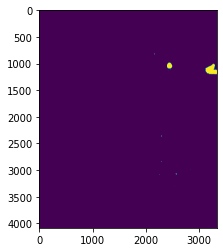

In [ ]:
for img in os.listdir(xml_img):
  img_path = f'/content/drive/MyDrive/INBREAST/AllXML/{img}'
  img_id = img.split(".")[0]
  img_array = load_inbreast_mask(img_path, imshape=(4084, 3328))

  final_array_img = Image.fromarray(np.uint8(img_array * 255) , 'L')
  plt.imshow(final_array_img )
  if os.path.exists("/content/drive/MyDrive/INBREAST/MaskImages/"):
    break
  else:
    os.mkdir("/content/drive/MyDrive/INBREAST/MaskImages/")
    final_array_img.save(f"/content/drive/MyDrive/INBREAST/MaskImages/{img_id}.jpg")

In [ ]:
df1.head()

,File Name,Severity
0,22678622,Normal
1,22678646,Malignant
2,22678670,Normal
3,22678694,Malignant
4,22614074,Malignant


In [ ]:
df_mask = df1[df1.Severity != "Normal"]

In [ ]:
df_mask.head()

,File Name,Severity
1,22678646,Malignant
3,22678694,Malignant
4,22614074,Malignant
5,22614097,Benign
6,22614127,Malignant


In [ ]:
labels = df_mask
dir = r"/content/drive/MyDrive/INBREAST/MaskImages/"
target_dir = r"/content/drive/MyDrive/INBREAST/MASK_CLASS/"

for filename, class_name in labels.values:

  if not os.path.exists(target_dir + str(class_name)):
    os.mkdir(target_dir + str(class_name))
  
  src_path = dir + "/" + filename + ".jpg"
  dst_path = target_dir + str(class_name) + "/" + filename + ".jpg"

  try:
    shutil.copy(src_path, dst_path)
  except IOError as e:
    print(f"Unable to copy file {src_path} to {dst_path}")
  except:
    print(f"When try to copy file {src_path} to {dst_pth}, unexpected error:{sys.exc_info()}")

In [ ]:
import subprocess

## define your paths
path1 = '/content/drive/MyDrive/INBREAST/MASK_CLASS/Benign/'
path2 = '/content/drive/MyDrive/INBREAST/MASK_CLASS/Malignant/'

## where to place the merged data
merged_path = '/content/drive/MyDrive/INBREAST/ALL_MASK'

## write an rsync commands to merge the directories
rsync_cmd = 'rsync' + ' -avzh ' + path1 + ' ' + path2 + ' ' + merged_path

## run the rsync command
subprocess.run(rsync_cmd, shell=True)

CompletedProcess(args='rsync -avzh /content/drive/MyDrive/INBREAST/MASK_CLASS/Benign/ /content/drive/MyDrive/INBREAST/MASK_CLASS/Malignant/ /content/drive/MyDrive/INBREAST/ALL_MASK', returncode=0)

In [ ]:
%%capture
!pip3 install tensorflow==2.2
!pip3 install keras==2.3.1
!pip3 install -U segmentation-models

In [ ]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [ ]:
SIZE_Y = 256
SIZE_X = 256

In [ ]:
img_dir = os.listdir("/content/drive/MyDrive/INBREAST/ALL_IMAGES/")
train_images = []
for index,img_id in enumerate(img_dir):
  img_path = f"/content/drive/MyDrive/INBREAST/ALL_IMAGES/{img_id}"
  img = cv2.imread(img_path, cv2.IMREAD_COLOR) 
  img = cv2.resize(img, (SIZE_Y, SIZE_X))
  #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  train_images.append(img)
  if index == 149:
    break

In [ ]:
train_images = np.array(train_images)

In [ ]:
mask_dir = os.listdir("/content/drive/MyDrive/INBREAST/ALL_MASK/")
train_masks = []
for index,img_id in enumerate(mask_dir):
  mask_path = f"/content/drive/MyDrive/INBREAST/ALL_MASK/{img_id}"
  mask = cv2.imread(mask_path, 0)       
  mask = cv2.resize(mask, (SIZE_Y, SIZE_X))
  mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
  train_masks.append(mask)
  if index == 149:
    break

In [ ]:
train_masks = np.array(train_masks)

In [ ]:
train_images.shape

(150, 256, 256, 3)

In [ ]:
train_masks.shape

(150, 256, 256, 3)

In [ ]:
#Use customary x_train and y_train variables
X = train_images
Y = train_masks

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

In [ ]:
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

In [ ]:

inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
s = inputs

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = Dropout(0.1)(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = Dropout(0.1)(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
  
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = Dropout(0.2)(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
  
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = Dropout(0.2)(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
  
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = Dropout(0.3)(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = Dropout(0.2)(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
  
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = Dropout(0.2)(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
  
u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = Dropout(0.1)(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
  
u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = Dropout(0.1)(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
  
outputs = Conv2D(3, (1, 1), activation='sigmoid')(c9)
  
model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 256, 256, 16) 448         input_3[0][0]                    
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 256, 256, 16) 0           conv2d_39[0][0]                  
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 256, 256, 16) 2320        dropout_19[0][0]                 
____________________________________________________________________________________________

In [ ]:
history=model.fit(x_train, 
          y_train,
          batch_size=2, 
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))

Train on 120 samples, validate on 30 samples
Epoch 1/10
120/120 [==============================] - 115s 956ms/step - loss: 1.0163 - accuracy: 0.1790 - val_loss: 0.3728 - val_accuracy: 0.0058
Epoch 2/10
120/120 [==============================] - 97s 811ms/step - loss: 0.2506 - accuracy: 0.0041 - val_loss: -0.1081 - val_accuracy: 7.7515e-04
Epoch 3/10
120/120 [==============================] - 94s 781ms/step - loss: -1.4897 - accuracy: 9.1298e-04 - val_loss: -3.7002 - val_accuracy: 0.0023
Epoch 4/10
120/120 [==============================] - 94s 782ms/step - loss: 52.2540 - accuracy: 0.0050 - val_loss: -1.8039 - val_accuracy: 0.0131
Epoch 5/10
120/120 [==============================] - 94s 779ms/step - loss: 3.3687 - accuracy: 0.0056 - val_loss: -2.1784 - val_accuracy: 4.4878e-04
Epoch 6/10
120/120 [==============================] - 94s 784ms/step - loss: -5.2623 - accuracy: 0.0017 - val_loss: -4.2633 - val_accuracy: 2.4685e-04
Epoch 7/10
120/120 [==============================] - 98s 81

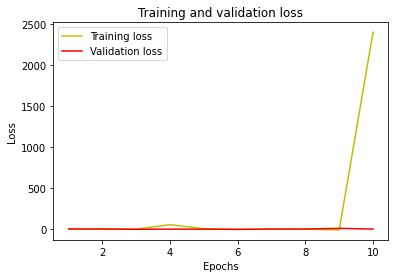

In [ ]:
#accuracy = model.evaluate(x_val, y_val)
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/INBREAST/INBREAST_UNET.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/INBREAST/INBREAST_UNET.h5', compile=False)
#Test on a different image
#READ EXTERNAL IMAGE...
test_img = cv2.imread('/content/drive/MyDrive/INBREAST/ALL_IMAGES/20588562.jpg', cv2.IMREAD_COLOR)       
test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
test_img = np.expand_dims(test_img, axis=0)

prediction = model.predict(test_img)

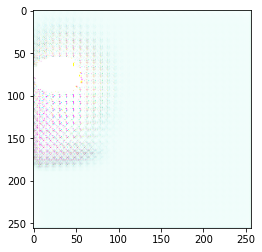

In [ ]:
#View and Save segmented image
prediction_image = prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')